# Lab 11 - Ensemble methods

## Exercises

### Single Classifier vs Bagging vs Boosting

In this exercise you will compare the accuracy of various types of classifier ensembles:

- a single decision tree – `DecisionTreeClassifier`
- a bagged decision tree – `BaggingClassifier`
- the AdaBoost algorithm for decision trees – `AdaBoostClassifier`
- the Gradient Boosting algorithm for decision trees – `GradientBoostingClassifier`

In this exercise use the full dataset obtained using load_wine() function - sklearn.datasets.

In [2]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(data, wine.target, test_size=0.2, random_state=1)

## Decision Tree Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
dt = dt.fit(data, wine.target)
y_pred = dt.predict(X_test)
dt_score = cross_val_score(dt, data, wine.target)

dt_expected = [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f'Cross val score: {dt_score}')
print(f'Expected values: {dt_expected}')

Accuracy: 0.9722222222222222
Cross val score: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
Expected values: [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]


## Bagging Classifier

In [5]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50)
bagging = bagging.fit(data, wine.target)
y_pred = bagging.predict(X_test)
bagging_score = cross_val_score(bagging, data, wine.target)

bagging_expected = [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.]
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f'Cross val score: {bagging_score}')
print(f'Expected values: {bagging_expected}')

Accuracy: 1.0
Cross val score: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
Expected values: [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.0]


## AdaBoost Classifier

In [6]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50, algorithm='SAMME')
adaBoost = adaBoost.fit(data, wine.target)
y_pred = adaBoost.predict(X_test)
adaBoost_score = cross_val_score(adaBoost, data, wine.target)

adaBoost_expected = [0.83333333, 0.91666667, 0.91666667, 1.0 ,1.0]
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f'Cross val score: {adaBoost_score}')
print(f'Expected values: {adaBoost_expected}')

Accuracy: 1.0
Cross val score: [0.83333333 0.91666667 0.91666667 1.         1.        ]
Expected values: [0.83333333, 0.91666667, 0.91666667, 1.0, 1.0]


## Gradient Boosting Classifer

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoost = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
gradientBoost = gradientBoost.fit(data, wine.target)
y_pred = gradientBoost.predict(X_test)
gradientBoost_score = cross_val_score(gradientBoost, data, wine.target)

gradientBoost_expected = [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f'Cross val score: {gradientBoost_score}')
print(f'Expected values: {gradientBoost_expected}')

Accuracy: 1.0
Cross val score: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]
Expected values: [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]


Determine an approximated number of iterations after which the Gradient Boosting model yields almost no further improvement by following these steps:

1. Fit the model on the whole dataset.
2. Compute the cumulative improvement, i.e. the OOB loss (call numpy.cumsum() function with GradientBoostingClassifier.oob_improvement_ attribute as its argument).
3. Prepare a plot of the above-mentioned OOB loss with respect to the number of iterations.

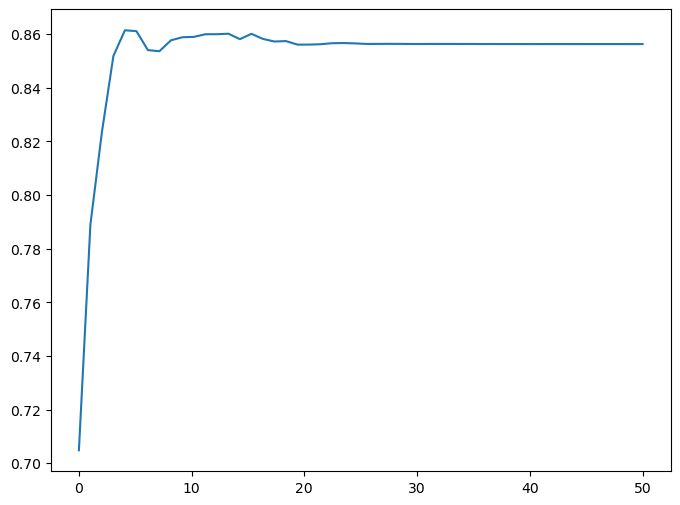

In [8]:
import matplotlib.pyplot as plt
import numpy as np

cumsum = np.cumsum(gradientBoost.oob_improvement_)
plt.figure(figsize=(8,6))
iterations = np.linspace(0,len(cumsum), 50)
plt.plot(iterations, cumsum)
plt.show()